In [1]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
db=mysql.connector.connect(host="localhost",user="root",passwd="1234",database="mavenmovies")

In [3]:
c=db.cursor()

### 1. Create a table called employees with the following structure? emp_id (integer, should not be NULL and should be a primary key)Qemp_name (text, should not be NULL)Q age (integer, should have a check constraint to ensure the age is at least 18)Q email (text, should be unique for each employee)Q salary (decimal, with a default value of 30,000).Write the SQL query to create the above table with all constraints.

In [13]:
'''
c.execute("""create table employees(
           emp_id INTEGER NOT NULL PRIMARY KEY,
           emp_name TEXT NOT NULL,
           age INTEGER CHECK (age >= 18),
           email varchar(60) UNIQUE,
           salary DECIMAL DEFAULT 30000

);""")'''

In [18]:
'''
tables = c.fetchall()

for table in tables:
    print(table[0])
'''

employees


### 2. Explain the purpose of constraints and how they help maintain data integrity in a database. Provide examples of common types of constraints.

In [ ]:
'''
Constraints are rules applied to database columns to ensure the accuracy and reliability of 
the data within a relational database management system (RDBMS). 

y enforcing constraints, databases can prevent issues such as duplicate records, invalid data 
entries, and violations of relationships between tables
'''

In [ ]:
'''
exmples :-
1. Primary Key Constraint
CREATE TABLE employees (
    emp_id INTEGER PRIMARY KEY,
    name TEXT NOT NULL
);

2. Foreign Key Constraint
CREATE TABLE departments (
    dept_id INTEGER PRIMARY KEY,
    dept_name TEXT NOT NULL
);

CREATE TABLE employees (
    emp_id INTEGER PRIMARY KEY,
    name TEXT NOT NULL,
    dept_id INTEGER,
    FOREIGN KEY (dept_id) REFERENCES departments(dept_id)
);
3. Unique Constraint
CREATE TABLE employees (
    emp_id INTEGER PRIMARY KEY,
    email VARCHAR(255) UNIQUE
);
4. Not Null Constraint
CREATE TABLE employees (
    emp_id INTEGER PRIMARY KEY,
    name TEXT NOT NULL
);
'''

### 3.Why would you apply the NOT NULL constraint to a column? Can a primary key contain NULL values? Justify your answer.

In [ ]:
'''
The NOT NULL constraint is applied to a column in a database table to enforce that the
column must always contain a value. 

No, a primary key cannot contain NULL values.

applying the NOT NULL constraint helps to maintain data integrity and enforce business rules,
whereas primary keys are integral to uniquely identifying entries in a table and enforcing 
the principle of entity integrity.
'''

### 4. Explain the steps and SQL commands used to add or remove constraints on an existing table. Provide an example for both adding and removing a constraint4. 

In [ ]:
'''
To add or remove constraints on an existing table in a database, you can use the SQL commands ALTER 
TABLE along with specific clauses for each operation.

Adding a Constraint;-

ALTER TABLE employees
ADD CONSTRAINT unique_email UNIQUE (email);

Removing a Constraint:-

ALTER TABLE employees
DROP CONSTRAINT unique_email;
'''

### 5. Explain the consequences of attempting to insert, update, or delete data in a way that violates constraints. Provide an example of an error message that might occur when violating a constraint

In [19]:
'''
Consequences of Violating Constraints
Error Messages: The database management system (DBMS) 
will prevent the operation from completing and will return an error message

Data Integrity Issues: Violating constraints can lead to inconsistent data in the database

Transaction Rollbacks: If a violation occurs within the context of a transaction
 the entire transaction may be rolled back.


'''

'\nConsequences of Violating Constraints\n\n\n'

In [ ]:
CREATE TABLE students (
    student_id INT PRIMARY KEY,
    email VARCHAR(100) UNIQUE NOT NULL,
    name VARCHAR(50) NOT NULL
);

In [ ]:
# Example of an Insert Violation
INSERT INTO students (student_id, email, name)
VALUES (1, 'ab.c@example.com', 'abc');

In [ ]:
'''
ERROR: duplicate key value violates unique constraint "students_email_key"
DETAIL: Key (email)=('john.doe@example.com') already exists.
'''

### 6. You created a products table without constraints as follows:

In [ ]:
CREATE TABLE products (

    product_id INT,

    product_name VARCHAR(50),

    price DECIMAL(10, 2));  
)

### Now, you realise that?The product_id should be a primary key , The price should have a default value of 50.00

In [20]:
# solution :-

In [21]:
# altering

In [ ]:
# The product_id should be a primary key 
ALTER TABLE products
ADD CONSTRAINT pk_product_id PRIMARY KEY (product_id);

In [ ]:
# The price should have a default value of 50.00
ALTER TABLE products
ALTER COLUMN price SET DEFAULT 50.00;

### 7. You have two tables:

### Write a query to fetch the student_name and class_name for each student using an INNER JOIN.

In [ ]:
# solution :-

In [ ]:
SELECT student_name, class_name FROM students 
INNER JOIN classes ON students.class_id = classes.class_id;

### 8 Consider the following three tables

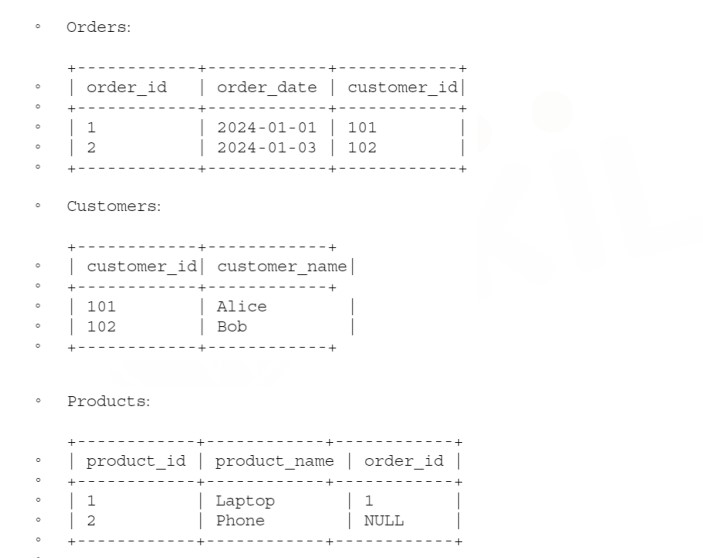

### Write a query that shows all order_id, customer_name, and product_name, ensuring that all products are listed even if they are not associated with an order Hint: (use INNER JOIN and LEFT JOIN)5

In [ ]:
# solution :-

SELECT 
    o.order_id, 
    c.customer_name, 
    p.product_name 
FROM 
    orders o 
INNER JOIN 
    customers c ON o.customer_id = c.customer_id
LEFT JOIN 
    products p ON o.order_id = p.order_id
ORDER BY 
    o.order_id, c.customer_name, p.product_name;

### 9 -Given the following tables:

In [ ]:
+---------+------------+--------+
| sales_id| product_id | amount |
+---------+------------+--------+
|    1    |    101     |  500   |
|    2    |    102     |  300   |
|    3    |    101     |  700   |
+---------+------------+--------+

In [ ]:
+------------+--------------+
| product_id | product_name |
+------------+--------------+
|    101     |    Laptop    |
|    102     |     Phone    |
+------------+--------------+

### Write a query to find the total sales amount for each product using an INNER JOIN and the SUM() function.

In [22]:
# solution :-

In [ ]:
SELECT products.product_name, SUM(sales.amount) AS total_sales FROM sales
INNER JOIN products ON sales.product_id = products.product_id
GROUP BY products.product_name;

### 10. You are given three tables:

In [ ]:
# customers 
+-------------+----------------+
| customer_id | customer_name   |
+-------------+----------------+
|      1      |     Alice       |
|      2      |      Bob        |
+-------------+----------------+


# orders
+----------+-------------+-------------+
| order_id | order_date  | customer_id |
+----------+-------------+-------------+
|    1     | 2024-01-05  |      1      |
|    2     | 2024-01-05  |      2      |
+----------+-------------+-------------+

#order_details
+----------+------------+----------+
| order_id | product_id | quantity |
+----------+------------+----------+
|    1     |     101    |    2     |
|    1     |     102    |    1     |
|    2     |     101    |    3     |
+----------+------------+----------+

### Write a query to display the order_id, customer_name, and the quantity of products ordered by each customer using an INNER JOIN between all three tables.

In [23]:
# solution :-

In [ ]:
SELECT orders.order_id,customers.customer_name,order_details.quantity FROM  orders
INNER JOIN customers ON orders.customer_id = customers.customer_id
INNER JOIN order_details ON orders.order_id = order_details.order_id;

In [ ]:
+----------+-----------------+----------+
| order_id | customer_name   | quantity |
+----------+-----------------+----------+
|    1     | Alice           |    2     |
|    1     | Alice           |    1     |
|    2     | Bob             |    3     |
|    3     | Alice           |    1     |
+----------+-----------------+----------+

# SQL Commands

###  1-Identify the primary keys and foreign keys in maven movies db. Discuss the differences

In [6]:
# solution :-

In [34]:
c.execute("SHOW CREATE TABLE actor;")
tables = c.fetchall()
for table in tables:
    print(table[1])

CREATE TABLE `actor` (
  `actor_id` smallint unsigned NOT NULL AUTO_INCREMENT,
  `first_name` varchar(45) NOT NULL,
  `last_name` varchar(45) NOT NULL,
  `last_update` timestamp NOT NULL DEFAULT CURRENT_TIMESTAMP ON UPDATE CURRENT_TIMESTAMP,
  PRIMARY KEY (`actor_id`),
  KEY `idx_actor_last_name` (`last_name`)
) ENGINE=InnoDB AUTO_INCREMENT=201 DEFAULT CHARSET=utf8mb4 COLLATE=utf8mb4_0900_ai_ci


In [35]:
c.execute("SHOW CREATE TABLE actor_award;")
tables = c.fetchall()
for table in tables:
    print(table[1])

CREATE TABLE `actor_award` (
  `actor_award_id` smallint unsigned NOT NULL AUTO_INCREMENT,
  `actor_id` smallint DEFAULT NULL,
  `first_name` varchar(45) NOT NULL,
  `last_name` varchar(45) NOT NULL,
  `awards` varchar(45) NOT NULL,
  `last_update` timestamp NOT NULL DEFAULT CURRENT_TIMESTAMP ON UPDATE CURRENT_TIMESTAMP,
  PRIMARY KEY (`actor_award_id`),
  KEY `idx_actor_last_name` (`last_name`)
) ENGINE=InnoDB AUTO_INCREMENT=158 DEFAULT CHARSET=utf8mb4 COLLATE=utf8mb4_0900_ai_ci


In [38]:
c.execute("SHOW CREATE TABLE address;")
tables = c.fetchall()
for table in tables:
    print(table[1])

CREATE TABLE `address` (
  `address_id` smallint unsigned NOT NULL AUTO_INCREMENT,
  `address` varchar(50) NOT NULL,
  `address2` varchar(50) DEFAULT NULL,
  `district` varchar(20) NOT NULL,
  `city_id` smallint unsigned NOT NULL,
  `postal_code` varchar(10) DEFAULT NULL,
  `phone` varchar(20) NOT NULL,
  `last_update` timestamp NOT NULL DEFAULT CURRENT_TIMESTAMP ON UPDATE CURRENT_TIMESTAMP,
  PRIMARY KEY (`address_id`),
  KEY `idx_fk_city_id` (`city_id`),
  CONSTRAINT `fk_address_city` FOREIGN KEY (`city_id`) REFERENCES `city` (`city_id`) ON DELETE RESTRICT ON UPDATE CASCADE
) ENGINE=InnoDB AUTO_INCREMENT=606 DEFAULT CHARSET=utf8mb4 COLLATE=utf8mb4_0900_ai_ci


In [ ]:
'''
Primary Key: 

Must contain unique values.

Cannot contain NULL values.

There can only be one primary key per table,
although it can consist of multiple columns (composite key).


Foreign Key:

Can accept duplicate values (as multiple records from one table can reference 
the same record in another table).

Can contain NULL values (if the relationship is optional).

A foreign key can reference a primary key from another table, ensuring that any value in the 
foreign key column corresponds to a valid entry in the referenced table.
'''

### 2- List all details of actors

In [39]:
#solution :-

In [46]:
c.execute("SELECT * FROM actor;")
tables = c.fetchall()
for i in tables:
    actor_id = i[0]       
    first_name = i[1]   
    last_name = i[2]     
    last_update = i[3]
    print(f"ID: {actor_id}, First Name: {first_name}, Last Name: {last_name}, Lastupdate: {last_update}")

ID: 1, First Name: PENELOPE, Last Name: GUINESS, Lastupdate: 2006-02-15 04:34:33
ID: 2, First Name: NICK, Last Name: WAHLBERG, Lastupdate: 2006-02-15 04:34:33
ID: 3, First Name: ED, Last Name: CHASE, Lastupdate: 2006-02-15 04:34:33
ID: 4, First Name: JENNIFER, Last Name: DAVIS, Lastupdate: 2006-02-15 04:34:33
ID: 5, First Name: JOHNNY, Last Name: LOLLOBRIGIDA, Lastupdate: 2006-02-15 04:34:33
ID: 6, First Name: BETTE, Last Name: NICHOLSON, Lastupdate: 2006-02-15 04:34:33
ID: 7, First Name: GRACE, Last Name: MOSTEL, Lastupdate: 2006-02-15 04:34:33
ID: 8, First Name: MATTHEW, Last Name: JOHANSSON, Lastupdate: 2006-02-15 04:34:33
ID: 9, First Name: JOE, Last Name: SWANK, Lastupdate: 2006-02-15 04:34:33
ID: 10, First Name: CHRISTIAN, Last Name: GABLE, Lastupdate: 2006-02-15 04:34:33
ID: 11, First Name: ZERO, Last Name: CAGE, Lastupdate: 2006-02-15 04:34:33
ID: 12, First Name: KARL, Last Name: BERRY, Lastupdate: 2006-02-15 04:34:33
ID: 13, First Name: UMA, Last Name: WOOD, Lastupdate: 2006-0

### 3 -List all customer information from DB.

In [53]:
df = pd.read_sql_query("SELECT * FROM customer;",db)
n=pd.DataFrame(df)
n

,customer_id,store_id,first_name,last_name,email,address_id,active,create_date,last_update
0,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,1,2006-02-14 22:04:36,2006-02-15 04:57:20
1,2,1,PATRICIA,JOHNSON,PATRICIA.JOHNSON@sakilacustomer.org,6,1,2006-02-14 22:04:36,2006-02-15 04:57:20
2,3,1,LINDA,WILLIAMS,LINDA.WILLIAMS@sakilacustomer.org,7,1,2006-02-14 22:04:36,2006-02-15 04:57:20
3,4,2,BARBARA,JONES,BARBARA.JONES@sakilacustomer.org,8,1,2006-02-14 22:04:36,2006-02-15 04:57:20
4,5,1,ELIZABETH,BROWN,ELIZABETH.BROWN@sakilacustomer.org,9,1,2006-02-14 22:04:36,2006-02-15 04:57:20
...,...,...,...,...,...,...,...,...,...
594,595,1,TERRENCE,GUNDERSON,TERRENCE.GUNDERSON@sakilacustomer.org,601,1,2006-02-14 22:04:37,2006-02-15 04:57:20
595,596,1,ENRIQUE,FORSYTHE,ENRIQUE.FORSYTHE@sakilacustomer.org,602,1,2006-02-14 22:04:37,2006-02-15 04:57:20
596,597,1,FREDDIE,DUGGAN,FREDDIE.DUGGAN@sakilacustomer.org,603,1,2006-02-14 22:04:37,2006-02-15 04:57:20
597,598,1,WADE,DELVALLE,WADE.DELVALLE@sakilacustomer.org,604,1,2006-02-14 22:04:37,2006-02-15 04:57:20


### 4 -List different countries.

In [54]:
# solution :-

In [55]:
df = pd.read_sql_query("SELECT * FROM country;",db)
n=pd.DataFrame(df)
n

,country_id,country,last_update
0,1,Afghanistan,2006-02-15 04:44:00
1,2,Algeria,2006-02-15 04:44:00
2,3,American Samoa,2006-02-15 04:44:00
3,4,Angola,2006-02-15 04:44:00
4,5,Anguilla,2006-02-15 04:44:00
...,...,...,...
104,105,Vietnam,2006-02-15 04:44:00
105,106,"Virgin Islands, U.S.",2006-02-15 04:44:00
106,107,Yemen,2006-02-15 04:44:00
107,108,Yugoslavia,2006-02-15 04:44:00


### 5 -Display all active customers.

In [56]:
# solution :-

In [57]:
df = pd.read_sql_query("SELECT * FROM customer WHERE active=1;",db)
n=pd.DataFrame(df)
n

,customer_id,store_id,first_name,last_name,email,address_id,active,create_date,last_update
0,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,1,2006-02-14 22:04:36,2006-02-15 04:57:20
1,2,1,PATRICIA,JOHNSON,PATRICIA.JOHNSON@sakilacustomer.org,6,1,2006-02-14 22:04:36,2006-02-15 04:57:20
2,3,1,LINDA,WILLIAMS,LINDA.WILLIAMS@sakilacustomer.org,7,1,2006-02-14 22:04:36,2006-02-15 04:57:20
3,4,2,BARBARA,JONES,BARBARA.JONES@sakilacustomer.org,8,1,2006-02-14 22:04:36,2006-02-15 04:57:20
4,5,1,ELIZABETH,BROWN,ELIZABETH.BROWN@sakilacustomer.org,9,1,2006-02-14 22:04:36,2006-02-15 04:57:20
...,...,...,...,...,...,...,...,...,...
579,595,1,TERRENCE,GUNDERSON,TERRENCE.GUNDERSON@sakilacustomer.org,601,1,2006-02-14 22:04:37,2006-02-15 04:57:20
580,596,1,ENRIQUE,FORSYTHE,ENRIQUE.FORSYTHE@sakilacustomer.org,602,1,2006-02-14 22:04:37,2006-02-15 04:57:20
581,597,1,FREDDIE,DUGGAN,FREDDIE.DUGGAN@sakilacustomer.org,603,1,2006-02-14 22:04:37,2006-02-15 04:57:20
582,598,1,WADE,DELVALLE,WADE.DELVALLE@sakilacustomer.org,604,1,2006-02-14 22:04:37,2006-02-15 04:57:20


### 6 -List of all rental IDs for customer with ID 1.

In [58]:
# solution :-

In [60]:
df = pd.read_sql_query("SELECT rental_id,customer_id FROM rental WHERE customer_id = 1;",db)
n=pd.DataFrame(df)
n

,rental_id,customer_id
0,76,1
1,573,1
2,1185,1
3,1422,1
4,1476,1
5,1725,1
6,2308,1
7,2363,1
8,3284,1
9,4526,1


### 7 - Display all the films whose rental duration is greater than 5 .

In [61]:
# solution :-

In [63]:
df = pd.read_sql_query("SELECT * FROM film WHERE rental_duration > 5;",db)
n=pd.DataFrame(df)
n

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,PG,"{Behind the Scenes, Deleted Scenes}",2006-02-15 05:03:42
1,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,None,7,2.99,50,18.99,NC-17,"{Trailers, Deleted Scenes}",2006-02-15 05:03:42
2,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,None,6,2.99,130,22.99,G,{Deleted Scenes},2006-02-15 05:03:42
3,7,AIRPLANE SIERRA,A Touching Saga of a Hunter And a Butler who m...,2006,1,None,6,4.99,62,28.99,PG-13,"{Trailers, Deleted Scenes}",2006-02-15 05:03:42
4,8,AIRPORT POLLOCK,A Epic Tale of a Moose And a Girl who must Con...,2006,1,None,6,4.99,54,15.99,R,{Trailers},2006-02-15 05:03:42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,988,WORKER TARZAN,A Action-Packed Yarn of a Secret Agent And a T...,2006,1,None,7,2.99,139,26.99,R,"{Commentaries, Trailers, Behind the Scenes}",2006-02-15 05:03:42
399,993,WRONG BEHAVIOR,A Emotional Saga of a Crocodile And a Sumo Wre...,2006,1,None,6,2.99,178,10.99,PG-13,"{Trailers, Behind the Scenes}",2006-02-15 05:03:42
400,994,WYOMING STORM,A Awe-Inspiring Panorama of a Robot And a Boat...,2006,1,None,6,4.99,100,29.99,PG-13,{Deleted Scenes},2006-02-15 05:03:42
401,996,YOUNG LANGUAGE,A Unbelieveable Yarn of a Boat And a Database ...,2006,1,None,6,0.99,183,9.99,G,"{Trailers, Behind the Scenes}",2006-02-15 05:03:42


### 8 - List the total number of films whose replacement cost is greater than $15 and less than $20.

In [64]:
# solution :-

In [66]:
df = pd.read_sql_query("SELECT COUNT(*) AS total_films FROM film WHERE replacement_cost > 15 AND replacement_cost < 20;",db)
n=pd.DataFrame(df)
n

,total_films
0,214


In [67]:
# if i want the list then 
df = pd.read_sql_query("SELECT * FROM film WHERE replacement_cost > 15 AND replacement_cost < 20;",db)
n=pd.DataFrame(df)
n

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,None,7,2.99,50,18.99,NC-17,"{Trailers, Deleted Scenes}",2006-02-15 05:03:42
1,6,AGENT TRUMAN,A Intrepid Panorama of a Robot And a Boy who m...,2006,1,None,3,2.99,169,17.99,PG,{Deleted Scenes},2006-02-15 05:03:42
2,8,AIRPORT POLLOCK,A Epic Tale of a Moose And a Girl who must Con...,2006,1,None,6,4.99,54,15.99,R,{Trailers},2006-02-15 05:03:42
3,11,ALAMO VIDEOTAPE,A Boring Epistle of a Butler And a Cat who mus...,2006,1,None,6,0.99,126,16.99,G,"{Commentaries, Behind the Scenes}",2006-02-15 05:03:42
4,21,AMERICAN CIRCUS,A Insightful Drama of a Girl And a Astronaut w...,2006,1,None,3,4.99,129,17.99,R,"{Commentaries, Behind the Scenes}",2006-02-15 05:03:42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,968,WEREWOLF LOLA,A Fanciful Story of a Man And a Sumo Wrestler ...,2006,1,None,6,4.99,79,19.99,G,"{Trailers, Behind the Scenes}",2006-02-15 05:03:42
210,983,WON DARES,A Unbelieveable Documentary of a Teacher And a...,2006,1,None,7,2.99,105,18.99,PG,{Behind the Scenes},2006-02-15 05:03:42
211,985,WONDERLAND CHRISTMAS,A Awe-Inspiring Character Study of a Waitress ...,2006,1,None,4,4.99,111,19.99,PG,{Commentaries},2006-02-15 05:03:42
212,992,WRATH MILE,A Intrepid Reflection of a Technical Writer An...,2006,1,None,5,0.99,176,17.99,NC-17,"{Commentaries, Trailers}",2006-02-15 05:03:42


### 9 - Display the count of unique first names of actors.

In [68]:
# solution :-

In [70]:
df = pd.read_sql_query("SELECT COUNT(DISTINCT first_name) AS unique_first_name_count FROM actor;",db)
n=pd.DataFrame(df)
n

,unique_first_name_count
0,128


### 10 - Display the first 10 records from the customer table 

In [71]:
# solution :-

In [72]:
df = pd.read_sql_query("SELECT * FROM customer;",db)
n=pd.DataFrame(df)
n.head(10)

,customer_id,store_id,first_name,last_name,email,address_id,active,create_date,last_update
0,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,1,2006-02-14 22:04:36,2006-02-15 04:57:20
1,2,1,PATRICIA,JOHNSON,PATRICIA.JOHNSON@sakilacustomer.org,6,1,2006-02-14 22:04:36,2006-02-15 04:57:20
2,3,1,LINDA,WILLIAMS,LINDA.WILLIAMS@sakilacustomer.org,7,1,2006-02-14 22:04:36,2006-02-15 04:57:20
3,4,2,BARBARA,JONES,BARBARA.JONES@sakilacustomer.org,8,1,2006-02-14 22:04:36,2006-02-15 04:57:20
4,5,1,ELIZABETH,BROWN,ELIZABETH.BROWN@sakilacustomer.org,9,1,2006-02-14 22:04:36,2006-02-15 04:57:20
5,6,2,JENNIFER,DAVIS,JENNIFER.DAVIS@sakilacustomer.org,10,1,2006-02-14 22:04:36,2006-02-15 04:57:20
6,7,1,MARIA,MILLER,MARIA.MILLER@sakilacustomer.org,11,1,2006-02-14 22:04:36,2006-02-15 04:57:20
7,8,2,SUSAN,WILSON,SUSAN.WILSON@sakilacustomer.org,12,1,2006-02-14 22:04:36,2006-02-15 04:57:20
8,9,2,MARGARET,MOORE,MARGARET.MOORE@sakilacustomer.org,13,1,2006-02-14 22:04:36,2006-02-15 04:57:20
9,10,1,DOROTHY,TAYLOR,DOROTHY.TAYLOR@sakilacustomer.org,14,1,2006-02-14 22:04:36,2006-02-15 04:57:20


### 11 - Display the first 3 records from the customer table whose first name starts with ‘b’.

In [74]:
# solution :-

In [75]:
df = pd.read_sql_query("SELECT * FROM customer WHERE first_name LIKE 'b%'LIMIT 3;",db)
n=pd.DataFrame(df)
n

,customer_id,store_id,first_name,last_name,email,address_id,active,create_date,last_update
0,4,2,BARBARA,JONES,BARBARA.JONES@sakilacustomer.org,8,1,2006-02-14 22:04:36,2006-02-15 04:57:20
1,14,2,BETTY,WHITE,BETTY.WHITE@sakilacustomer.org,18,1,2006-02-14 22:04:36,2006-02-15 04:57:20
2,31,2,BRENDA,WRIGHT,BRENDA.WRIGHT@sakilacustomer.org,35,1,2006-02-14 22:04:36,2006-02-15 04:57:20


### 12 -Display the names of the first 5 movies which are rated as ‘G’.

In [76]:
# solution :

In [78]:
df = pd.read_sql_query("SELECT title,rating FROM film WHERE rating = 'G'LIMIT 5;",db)
n=pd.DataFrame(df)
n

,title,rating
0,ACE GOLDFINGER,G
1,AFFAIR PREJUDICE,G
2,AFRICAN EGG,G
3,ALAMO VIDEOTAPE,G
4,AMISTAD MIDSUMMER,G


### 13-Find all customers whose first name starts with "a".

In [79]:
# solution :-

In [80]:
df = pd.read_sql_query("SELECT * FROM customer WHERE first_name LIKE 'a%';",db)
n=pd.DataFrame(df)
n

,customer_id,store_id,first_name,last_name,email,address_id,active,create_date,last_update
0,29,2,ANGELA,HERNANDEZ,ANGELA.HERNANDEZ@sakilacustomer.org,33,1,2006-02-14 22:04:36,2006-02-15 04:57:20
1,32,1,AMY,LOPEZ,AMY.LOPEZ@sakilacustomer.org,36,1,2006-02-14 22:04:36,2006-02-15 04:57:20
2,33,2,ANNA,HILL,ANNA.HILL@sakilacustomer.org,37,1,2006-02-14 22:04:36,2006-02-15 04:57:20
3,40,2,AMANDA,CARTER,AMANDA.CARTER@sakilacustomer.org,44,1,2006-02-14 22:04:36,2006-02-15 04:57:20
4,48,1,ANN,EVANS,ANN.EVANS@sakilacustomer.org,52,1,2006-02-14 22:04:36,2006-02-15 04:57:20
5,51,1,ALICE,STEWART,ALICE.STEWART@sakilacustomer.org,55,1,2006-02-14 22:04:36,2006-02-15 04:57:20
6,63,1,ASHLEY,RICHARDSON,ASHLEY.RICHARDSON@sakilacustomer.org,67,1,2006-02-14 22:04:36,2006-02-15 04:57:20
7,81,1,ANDREA,HENDERSON,ANDREA.HENDERSON@sakilacustomer.org,85,1,2006-02-14 22:04:36,2006-02-15 04:57:20
8,85,2,ANNE,POWELL,ANNE.POWELL@sakilacustomer.org,89,1,2006-02-14 22:04:36,2006-02-15 04:57:20
9,97,2,ANNIE,RUSSELL,ANNIE.RUSSELL@sakilacustomer.org,101,1,2006-02-14 22:04:36,2006-02-15 04:57:20


### 14- Find all customers whose first name ends with "a".

In [82]:
df = pd.read_sql_query("SELECT * FROM customer WHERE first_name LIKE '%a';",db)

In [83]:
df

,customer_id,store_id,first_name,last_name,email,address_id,active,create_date,last_update
0,2,1,PATRICIA,JOHNSON,PATRICIA.JOHNSON@sakilacustomer.org,6,1,2006-02-14 22:04:36,2006-02-15 04:57:20
1,3,1,LINDA,WILLIAMS,LINDA.WILLIAMS@sakilacustomer.org,7,1,2006-02-14 22:04:36,2006-02-15 04:57:20
2,4,2,BARBARA,JONES,BARBARA.JONES@sakilacustomer.org,8,1,2006-02-14 22:04:36,2006-02-15 04:57:20
3,7,1,MARIA,MILLER,MARIA.MILLER@sakilacustomer.org,11,1,2006-02-14 22:04:36,2006-02-15 04:57:20
4,11,2,LISA,ANDERSON,LISA.ANDERSON@sakilacustomer.org,15,1,2006-02-14 22:04:36,2006-02-15 04:57:20
...,...,...,...,...,...,...,...,...,...
91,286,1,VELMA,LUCAS,VELMA.LUCAS@sakilacustomer.org,291,1,2006-02-14 22:04:37,2006-02-15 04:57:20
92,290,1,KRISTINA,CHAMBERS,KRISTINA.CHAMBERS@sakilacustomer.org,295,1,2006-02-14 22:04:37,2006-02-15 04:57:20
93,296,2,RAMONA,HALE,RAMONA.HALE@sakilacustomer.org,301,1,2006-02-14 22:04:37,2006-02-15 04:57:20
94,298,1,ERIKA,PENA,ERIKA.PENA@sakilacustomer.org,303,1,2006-02-14 22:04:37,2006-02-15 04:57:20


### 15- Display the list of first 4 cities which start and end with ‘a’ 

In [84]:
# solution :-

In [88]:
df = pd.read_sql_query("SELECT * FROM city WHERE city LIKE 'a%' AND city LIKE '%a' LIMIT 4;",db)
df

,city_id,city,country_id,last_update
0,2,Abha,82,2006-02-15 04:45:25
1,4,Acua,60,2006-02-15 04:45:25
2,5,Adana,97,2006-02-15 04:45:25
3,6,Addis Abeba,31,2006-02-15 04:45:25


### 16- Find all customers whose first name have "NI" in any position.

In [89]:
# solution :-

In [91]:
df = pd.read_sql_query(" SELECT * FROM customer WHERE first_name LIKE '%NI%';",db)
df

,customer_id,store_id,first_name,last_name,email,address_id,active,create_date,last_update
0,6,2,JENNIFER,DAVIS,JENNIFER.DAVIS@sakilacustomer.org,10,1,2006-02-14 22:04:36,2006-02-15 04:57:20
1,35,2,VIRGINIA,GREEN,VIRGINIA.GREEN@sakilacustomer.org,39,1,2006-02-14 22:04:36,2006-02-15 04:57:20
2,41,1,STEPHANIE,MITCHELL,STEPHANIE.MITCHELL@sakilacustomer.org,45,1,2006-02-14 22:04:36,2006-02-15 04:57:20
3,66,2,JANICE,WARD,JANICE.WARD@sakilacustomer.org,70,1,2006-02-14 22:04:36,2006-02-15 04:57:20
4,68,1,NICOLE,PETERSON,NICOLE.PETERSON@sakilacustomer.org,72,1,2006-02-14 22:04:36,2006-02-15 04:57:20
5,74,1,DENISE,KELLY,DENISE.KELLY@sakilacustomer.org,78,1,2006-02-14 22:04:36,2006-02-15 04:57:20
6,88,2,BONNIE,HUGHES,BONNIE.HUGHES@sakilacustomer.org,92,1,2006-02-14 22:04:36,2006-02-15 04:57:20
7,97,2,ANNIE,RUSSELL,ANNIE.RUSSELL@sakilacustomer.org,101,1,2006-02-14 22:04:36,2006-02-15 04:57:20
8,106,1,CONNIE,WALLACE,CONNIE.WALLACE@sakilacustomer.org,110,1,2006-02-14 22:04:36,2006-02-15 04:57:20
9,131,2,MONICA,HICKS,MONICA.HICKS@sakilacustomer.org,135,1,2006-02-14 22:04:36,2006-02-15 04:57:20


### 17- Find all customers whose first name have "r" in the second position .

In [92]:
# solution :-

In [93]:
df = pd.read_sql_query(" SELECT * FROM customer WHERE first_name LIKE '_r%';",db)
df

,customer_id,store_id,first_name,last_name,email,address_id,active,create_date,last_update
0,31,2,BRENDA,WRIGHT,BRENDA.WRIGHT@sakilacustomer.org,35,1,2006-02-14 22:04:36,2006-02-15 04:57:20
1,47,1,FRANCES,PARKER,FRANCES.PARKER@sakilacustomer.org,51,1,2006-02-14 22:04:36,2006-02-15 04:57:20
2,76,2,IRENE,PRICE,IRENE.PRICE@sakilacustomer.org,80,1,2006-02-14 22:04:36,2006-02-15 04:57:20
3,102,1,CRYSTAL,FORD,CRYSTAL.FORD@sakilacustomer.org,106,1,2006-02-14 22:04:36,2006-02-15 04:57:20
4,108,1,TRACY,COLE,TRACY.COLE@sakilacustomer.org,112,1,2006-02-14 22:04:36,2006-02-15 04:57:20
5,114,2,GRACE,ELLIS,GRACE.ELLIS@sakilacustomer.org,118,1,2006-02-14 22:04:36,2006-02-15 04:57:20
6,160,2,ERIN,DUNN,ERIN.DUNN@sakilacustomer.org,164,1,2006-02-14 22:04:36,2006-02-15 04:57:20
7,169,2,ERICA,MATTHEWS,ERICA.MATTHEWS@sakilacustomer.org,173,0,2006-02-14 22:04:36,2006-02-15 04:57:20
8,187,2,BRITTANY,RILEY,BRITTANY.RILEY@sakilacustomer.org,191,1,2006-02-14 22:04:36,2006-02-15 04:57:20
9,194,2,KRISTEN,CHAVEZ,KRISTEN.CHAVEZ@sakilacustomer.org,198,1,2006-02-14 22:04:36,2006-02-15 04:57:20


### 18 - Find all customers whose first name starts with "a" and are at least 5 characters in length.

In [94]:
# solution :-

In [97]:
df = pd.read_sql_query(" SELECT * FROM customer WHERE first_name LIKE 'a%' AND LENGTH(first_name)<=5;",db)
df

,customer_id,store_id,first_name,last_name,email,address_id,active,create_date,last_update
0,32,1,AMY,LOPEZ,AMY.LOPEZ@sakilacustomer.org,36,1,2006-02-14 22:04:36,2006-02-15 04:57:20
1,33,2,ANNA,HILL,ANNA.HILL@sakilacustomer.org,37,1,2006-02-14 22:04:36,2006-02-15 04:57:20
2,48,1,ANN,EVANS,ANN.EVANS@sakilacustomer.org,52,1,2006-02-14 22:04:36,2006-02-15 04:57:20
3,51,1,ALICE,STEWART,ALICE.STEWART@sakilacustomer.org,55,1,2006-02-14 22:04:36,2006-02-15 04:57:20
4,85,2,ANNE,POWELL,ANNE.POWELL@sakilacustomer.org,89,1,2006-02-14 22:04:36,2006-02-15 04:57:20
5,97,2,ANNIE,RUSSELL,ANNIE.RUSSELL@sakilacustomer.org,101,1,2006-02-14 22:04:36,2006-02-15 04:57:20
6,136,2,ANITA,MORALES,ANITA.MORALES@sakilacustomer.org,140,1,2006-02-14 22:04:36,2006-02-15 04:57:20
7,139,1,AMBER,DIXON,AMBER.DIXON@sakilacustomer.org,143,1,2006-02-14 22:04:36,2006-02-15 04:57:20
8,142,1,APRIL,BURNS,APRIL.BURNS@sakilacustomer.org,146,1,2006-02-14 22:04:36,2006-02-15 04:57:20
9,181,2,ANA,BRADLEY,ANA.BRADLEY@sakilacustomer.org,185,1,2006-02-14 22:04:36,2006-02-15 04:57:20


### 19- Find all customers whose first name starts with "a" and ends with "o".

In [98]:
# solution :-

In [99]:
df = pd.read_sql_query(" SELECT * FROM customer WHERE first_name LIKE 'a%' AND first_name LIKE '%o';",db)
df

,customer_id,store_id,first_name,last_name,email,address_id,active,create_date,last_update
0,398,1,ANTONIO,MEEK,ANTONIO.MEEK@sakilacustomer.org,403,1,2006-02-14 22:04:37,2006-02-15 04:57:20
1,556,2,ARMANDO,GRUBER,ARMANDO.GRUBER@sakilacustomer.org,562,1,2006-02-14 22:04:37,2006-02-15 04:57:20
2,567,2,ALFREDO,MCADAMS,ALFREDO.MCADAMS@sakilacustomer.org,573,1,2006-02-14 22:04:37,2006-02-15 04:57:20
3,568,2,ALBERTO,HENNING,ALBERTO.HENNING@sakilacustomer.org,574,1,2006-02-14 22:04:37,2006-02-15 04:57:20


### 20 - Get the films with pg and pg-13 rating using IN operator.

In [100]:
# solution :-

In [102]:
df = pd.read_sql_query(" SELECT * FROM film WHERE rating IN ('PG', 'PG-13');",db)
df

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,PG,"{Behind the Scenes, Deleted Scenes}",2006-02-15 05:03:42
1,6,AGENT TRUMAN,A Intrepid Panorama of a Robot And a Boy who m...,2006,1,None,3,2.99,169,17.99,PG,{Deleted Scenes},2006-02-15 05:03:42
2,7,AIRPLANE SIERRA,A Touching Saga of a Hunter And a Butler who m...,2006,1,None,6,4.99,62,28.99,PG-13,"{Trailers, Deleted Scenes}",2006-02-15 05:03:42
3,9,ALABAMA DEVIL,A Thoughtful Panorama of a Database Administra...,2006,1,None,3,2.99,114,21.99,PG-13,"{Trailers, Deleted Scenes}",2006-02-15 05:03:42
4,12,ALASKA PHANTOM,A Fanciful Saga of a Hunter And a Pastry Chef ...,2006,1,None,6,0.99,136,22.99,PG,"{Commentaries, Deleted Scenes}",2006-02-15 05:03:42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,987,WORDS HUNTER,A Action-Packed Reflection of a Composer And a...,2006,1,None,3,2.99,116,13.99,PG,"{Commentaries, Trailers, Deleted Scenes}",2006-02-15 05:03:42
413,990,WORLD LEATHERNECKS,A Unbelieveable Tale of a Pioneer And a Astron...,2006,1,None,3,0.99,171,13.99,PG-13,"{Trailers, Behind the Scenes}",2006-02-15 05:03:42
414,991,WORST BANGER,A Thrilling Drama of a Madman And a Dentist wh...,2006,1,None,4,2.99,185,26.99,PG,"{Behind the Scenes, Deleted Scenes}",2006-02-15 05:03:42
415,993,WRONG BEHAVIOR,A Emotional Saga of a Crocodile And a Sumo Wre...,2006,1,None,6,2.99,178,10.99,PG-13,"{Trailers, Behind the Scenes}",2006-02-15 05:03:42


### 21 - Get the films with length between 50 to 100 using between operator.

In [103]:
# solution :-

In [104]:
df = pd.read_sql_query(" SELECT * FROM film WHERE LENGTH BETWEEN 50 AND 100;",db)
df

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,PG,"{Behind the Scenes, Deleted Scenes}",2006-02-15 05:03:42
1,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,None,7,2.99,50,18.99,NC-17,"{Trailers, Deleted Scenes}",2006-02-15 05:03:42
2,7,AIRPLANE SIERRA,A Touching Saga of a Hunter And a Butler who m...,2006,1,None,6,4.99,62,28.99,PG-13,"{Trailers, Deleted Scenes}",2006-02-15 05:03:42
3,8,AIRPORT POLLOCK,A Epic Tale of a Moose And a Girl who must Con...,2006,1,None,6,4.99,54,15.99,R,{Trailers},2006-02-15 05:03:42
4,10,ALADDIN CALENDAR,A Action-Packed Tale of a Man And a Lumberjack...,2006,1,None,6,4.99,63,24.99,NC-17,"{Trailers, Deleted Scenes}",2006-02-15 05:03:42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,986,WONKA SEA,A Brilliant Saga of a Boat And a Mad Scientist...,2006,1,None,6,2.99,85,24.99,NC-17,"{Commentaries, Trailers}",2006-02-15 05:03:42
358,989,WORKING MICROCOSMOS,A Stunning Epistle of a Dentist And a Dog who ...,2006,1,None,4,4.99,74,22.99,R,"{Commentaries, Deleted Scenes}",2006-02-15 05:03:42
359,994,WYOMING STORM,A Awe-Inspiring Panorama of a Robot And a Boat...,2006,1,None,6,4.99,100,29.99,PG-13,{Deleted Scenes},2006-02-15 05:03:42
360,995,YENTL IDAHO,A Amazing Display of a Robot And a Astronaut w...,2006,1,None,5,4.99,86,11.99,R,"{Commentaries, Trailers, Deleted Scenes}",2006-02-15 05:03:42


### 22 - Get the top 50 actors using limit operator

In [105]:
# solution :-

In [119]:
query = """
SELECT actor.actor_id, actor.first_name, COUNT(film_actor.film_id) AS film_count
FROM actor
JOIN film_actor ON actor.actor_id = film_actor.actor_id
JOIN film ON film_actor.film_id = film.film_id
GROUP BY actor.actor_id, actor.first_name
ORDER BY film_count DESC
LIMIT 50;
"""

In [120]:
df = pd.read_sql_query(query, db)
df

,actor_id,first_name,film_count
0,107,GINA,42
1,102,WALTER,41
2,198,MARY,40
3,181,MATTHEW,39
4,23,SANDRA,37
5,81,SCARLETT,36
6,13,UMA,35
7,60,HENRY,35
8,144,ANGELA,35
9,158,VIVIEN,35


### 23 - Get the distinct film ids from inventory table.

In [121]:
# solution :-

In [122]:
df = pd.read_sql_query("SELECT DISTINCT film_id FROM inventory;", db)
df

,film_id
0,1
1,2
2,3
3,4
4,5
...,...
953,996
954,997
955,998
956,999


# Functions



## Basic Aggregate Functions:

In [85]:
db=mysql.connector.connect(host="localhost",user="root",passwd="1234",database="sakila")
c=db.cursor()

### 1 Retrieve the total number of rentals made in the Sakila database. Hint: Use the COUNT() function.

In [124]:
# solution :-

In [127]:
df = pd.read_sql_query("SELECT COUNT(*) AS total_rentals FROM rental;", db)
df

,total_rentals
0,16044


### 2 Find the average rental duration (in days) of movies rented from the Sakila database. Hint: Utilize the AVG() function

In [128]:
# solution :-

In [129]:
df = pd.read_sql_query("SELECT AVG(rental_duration) AS average_rental_duration FROM film;", db)
df

,average_rental_duration
0,4.985


### 3 Display the first name and last name of customers in uppercase. Hint: Use the UPPER () function.

In [130]:
# solution :-

In [133]:
df = pd.read_sql_query("SELECT UPPER(first_name) AS first_name_upper, UPPER(last_name) AS last_name_upper FROM customer;", db)
df

,first_name_upper,last_name_upper
0,MARY,SMITH
1,PATRICIA,JOHNSON
2,LINDA,WILLIAMS
3,BARBARA,JONES
4,ELIZABETH,BROWN
...,...,...
594,TERRENCE,GUNDERSON
595,ENRIQUE,FORSYTHE
596,FREDDIE,DUGGAN
597,WADE,DELVALLE


### 4 Extract the month from the rental date and display it alongside the rental ID.Hint: Employ the MONTH() function.

In [134]:
# solution :-

In [135]:
df = pd.read_sql_query("SELECT rental_id, MONTH(rental_date) AS rental_month FROM rental;", db)
df

,rental_id,rental_month
0,1,5
1,2,5
2,3,5
3,4,5
4,5,5
...,...,...
16039,13486,2
16040,15966,2
16041,11676,2
16042,14616,2


### 5 Retrieve the count of rentals for each customer (display customer ID and the count of rentals). Hint: Use COUNT () in conjunction with GROUP BY.

In [136]:
# solution :-

In [137]:
df = pd.read_sql_query("SELECT customer.customer_id, COUNT(rental.rental_id)FROM customer LEFT JOIN rental ON customer.customer_id = rental.customer_id GROUP BY customer.customer_id;", db)
df

,customer_id,COUNT(rental.rental_id)
0,1,32
1,2,27
2,3,26
3,4,22
4,5,38
...,...,...
594,595,30
595,596,28
596,597,25
597,598,22


### 6 Find the total revenue generated by each store. Hint: Combine SUM() and GROUP BY.

In [138]:
# solution:-

In [139]:
df = pd.read_sql_query("SELECT store_id, SUM(amount) AS total_revenue FROM payment JOIN rental ON payment.rental_id = rental.rental_id JOIN inventory ON rental.inventory_id = inventory.inventory_id GROUP BY store_id;", db)
df

,store_id,total_revenue
0,1,33679.79
1,2,33726.77


### 7 Determine the total number of rentals for each category of movies. Hint: JOIN film_category, film, and rental tables, then use cOUNT () and GROUP BY.

In [140]:
# solution :-

In [148]:
query="""
SELECT category.name, 
COUNT(rental.rental_id) as totalrental
FROM category 
JOIN film_category ON category.category_id = film_category.category_id 
JOIN film ON film_category.film_id = film.film_id 
JOIN rental ON film.film_id = rental.rental_id 
GROUP BY category.name 
ORDER BY COUNT(rental.rental_id) DESC;

"""

In [149]:
df = pd.read_sql_query(query, db)
df

,name,totalrental
0,Sports,74
1,Foreign,73
2,Family,69
3,Documentary,68
4,Animation,66
5,Action,64
6,Drama,62
7,New,62
8,Games,61
9,Sci-Fi,61


### 8 Find the average rental rate of movies in each language. Hint: JOIN film and language tables, then use AVG () and GROUP BY.

In [150]:
# solution :-

In [167]:
query="""
SELECT language.name, 
AVG(film.rental_rate) AS average_rental_rate 
FROM language 
LEFT JOIN film ON language.language_id = film.language_id 
GROUP BY language.name
ORDER BY average_rental_rate;
"""

In [168]:
df = pd.read_sql_query(query, db)
df

,name,average_rental_rate
0,Italian,NaN
1,Japanese,NaN
2,Mandarin,NaN
3,French,NaN
4,German,NaN
5,English,2.98


# Joins

### 9 Display the title of the movie, customer s first name, and last name who rented it. Hint: Use JOIN between the film, inventory, rental, and customer tables.

In [4]:
# solution :-

In [5]:
query="""
SELECT 
    film.title AS title,
    customer.first_name AS first_name,
    customer.last_name AS last_name
FROM 
    film
JOIN 
    inventory ON film.film_id = inventory.film_id
JOIN 
    rental ON inventory.inventory_id = rental.inventory_id
JOIN 
    customer ON rental.customer_id = customer.customer_id;
"""

In [6]:
df = pd.read_sql_query(query, db)
df

,title,first_name,last_name
0,ACADEMY DINOSAUR,JOEL,FRANCISCO
1,ACADEMY DINOSAUR,GABRIEL,HARDER
2,ACADEMY DINOSAUR,DIANNE,SHELTON
3,ACADEMY DINOSAUR,NORMAN,CURRIER
4,ACADEMY DINOSAUR,BEATRICE,ARNOLD
...,...,...,...
16039,ZORRO ARK,JESSIE,BANKS
16040,ZORRO ARK,JACKIE,LYNCH
16041,ZORRO ARK,MAUREEN,LITTLE
16042,ZORRO ARK,TONY,CARRANZA


### 10 Retrieve the names of all actors who have appeared in the film "Gone with the Wind." Hint: Use JOIN between the film actor, film, and actor tables.

In [7]:
# solution :-

In [ ]:
query="""
SELECT 
    actor.first_name, 
    actor.last_name
FROM 
    film
JOIN 
    film_actor ON film.film_id = film_actor.film_id
JOIN 
    actor ON film_actor.actor_id = actor.actor_id
WHERE 
    film.title = 'Gone with the Wind';
"""

In [8]:
df = pd.read_sql_query(query, db)
df

,title,first_name,last_name
0,ACADEMY DINOSAUR,JOEL,FRANCISCO
1,ACADEMY DINOSAUR,GABRIEL,HARDER
2,ACADEMY DINOSAUR,DIANNE,SHELTON
3,ACADEMY DINOSAUR,NORMAN,CURRIER
4,ACADEMY DINOSAUR,BEATRICE,ARNOLD
...,...,...,...
16039,ZORRO ARK,JESSIE,BANKS
16040,ZORRO ARK,JACKIE,LYNCH
16041,ZORRO ARK,MAUREEN,LITTLE
16042,ZORRO ARK,TONY,CARRANZA


### 11 Retrieve the customer names along with the total amount they've spent on rentals. Hint: JOIN customer, payment, and rental tables, then use SUM() and GROUP BY.

In [9]:
# solution :-

In [10]:
query="""
SELECT 
    customer.first_name, 
    customer.last_name, 
    SUM(payment.amount) AS total_spent
FROM 
    customer
JOIN 
    payment ON customer.customer_id = payment.customer_id
JOIN 
    rental ON payment.rental_id = rental.rental_id
GROUP BY 
    customer.customer_id, customer.first_name, customer.last_name
ORDER BY 
    total_spent DESC;
"""

In [11]:
df = pd.read_sql_query(query, db)
df

,first_name,last_name,total_spent
0,KARL,SEAL,221.55
1,ELEANOR,HUNT,216.54
2,CLARA,SHAW,195.58
3,RHONDA,KENNEDY,194.61
4,MARION,SNYDER,194.61
...,...,...,...
594,ANNIE,RUSSELL,58.82
595,JOHNNY,TURPIN,57.81
596,BRIAN,WYMAN,52.88
597,LEONA,OBRIEN,50.86


### 12 List the titles of movies rented by each customer in a particular city (e.g., 'London').Hint: JOIN customer, address, city, rental, inventory, and film tables, then use GROUP BY.

In [12]:
# solution :-

In [19]:
query="""
SELECT 
    customer.first_name, 
    customer.last_name, 
    film.title
FROM 
    customer
JOIN 
    address ON customer.address_id = address.address_id
JOIN 
    city ON address.city_id = city.city_id
JOIN 
    rental ON customer.customer_id = rental.customer_id
JOIN 
    inventory ON rental.inventory_id = inventory.inventory_id
JOIN 
    film ON inventory.film_id = film.film_id
WHERE 
    city.city = 'London'
ORDER BY 
    customer.last_name, customer.first_name, film.title;
"""

In [20]:
df = pd.read_sql_query(query, db)
df

,first_name,last_name,title
0,MATTIE,HOFFMAN,ACADEMY DINOSAUR
1,MATTIE,HOFFMAN,CHICKEN HELLFIGHTERS
2,MATTIE,HOFFMAN,COLDBLOODED DARLING
3,MATTIE,HOFFMAN,CONQUERER NUTS
4,MATTIE,HOFFMAN,DARKNESS WAR
5,MATTIE,HOFFMAN,DOOM DANCING
6,MATTIE,HOFFMAN,DRIFTER COMMANDMENTS
7,MATTIE,HOFFMAN,EMPIRE MALKOVICH
8,MATTIE,HOFFMAN,FACTORY DRAGON
9,MATTIE,HOFFMAN,FLATLINERS KILLER


# Advanced Joins and GROUP BY:



### 13 Display the top 5 rented movies along with the number of times they've been rented.Hint: JOIN film, inventory, and rental tables, then use COUNT () and GROUP BY, and limit the results.

In [21]:
# solution :-

In [26]:
query="""
SELECT 
    film.title, 
    COUNT(rental.rental_id) AS no_of_times
FROM 
    film
JOIN 
    inventory ON film.film_id = inventory.film_id
JOIN 
    rental ON inventory.inventory_id = rental.inventory_id
GROUP BY 
    film.title
ORDER BY 
    no_of_times DESC
LIMIT 5;
"""

In [27]:
df = pd.read_sql_query(query, db)
df

,title,no_of_times
0,BUCKET BROTHERHOOD,34
1,ROCKETEER MOTHER,33
2,FORWARD TEMPLE,32
3,GRIT CLOCKWORK,32
4,JUGGLER HARDLY,32


### 14 Determine the customers who have rented movies from both stores (store ID 1 and store ID 2). Hint: Use JOINS with rental, inventory, and customer tables and consider COUNT() and GROUP BY.

In [28]:
# solution :-

In [30]:
query= """

SELECT 
    customer.customer_id,
    customer.first_name,
    customer.last_name
FROM 
    customer
JOIN 
    rental ON customer.customer_id = rental.customer_id
JOIN 
    inventory ON rental.inventory_id = inventory.inventory_id
WHERE 
    inventory.store_id IN (1, 2)  
GROUP BY 
    customer.customer_id
HAVING 
    COUNT(DISTINCT inventory.store_id) = 2;
"""

In [31]:
df = pd.read_sql_query(query, db)
df

,customer_id,first_name,last_name
0,1,MARY,SMITH
1,2,PATRICIA,JOHNSON
2,3,LINDA,WILLIAMS
3,4,BARBARA,JONES
4,5,ELIZABETH,BROWN
...,...,...,...
594,595,TERRENCE,GUNDERSON
595,596,ENRIQUE,FORSYTHE
596,597,FREDDIE,DUGGAN
597,598,WADE,DELVALLE


# Windows Function:

### 1. Rank the customers based on the total amount they've spent on rentals.

In [32]:
# solution :-

In [33]:
query="""
SELECT 
    customer.customer_id, 
    customer.first_name, 
    customer.last_name, 
    SUM(payment.amount) AS total_spent, 
    RANK() OVER (ORDER BY SUM(payment.amount) DESC) AS spending_rank 
FROM 
    customer 
JOIN 
    rental ON customer.customer_id = rental.customer_id 
JOIN 
    payment ON rental.rental_id = payment.rental_id 
GROUP BY 
    customer.customer_id, 
    customer.first_name, 
    customer.last_name 
ORDER BY 
    spending_rank;
"""

In [34]:
df = pd.read_sql_query(query, db)
df

,customer_id,first_name,last_name,total_spent,spending_rank
0,526,KARL,SEAL,221.55,1
1,148,ELEANOR,HUNT,216.54,2
2,144,CLARA,SHAW,195.58,3
3,137,RHONDA,KENNEDY,194.61,4
4,178,MARION,SNYDER,194.61,4
...,...,...,...,...,...
594,97,ANNIE,RUSSELL,58.82,595
595,395,JOHNNY,TURPIN,57.81,596
596,318,BRIAN,WYMAN,52.88,597
597,281,LEONA,OBRIEN,50.86,598


### 2. Calculate the cumulative revenue generated by each film over time

In [35]:
# solution :-

In [38]:
query="""
SELECT 
    f.title, 
    r.rental_date, 
    SUM(p.amount) AS revenue,
    SUM(SUM(p.amount)) OVER (PARTITION BY f.title ORDER BY r.rental_date) AS cumulative_revenue
FROM 
    rental r
JOIN 
    inventory i ON r.inventory_id = i.inventory_id
JOIN 
    film f ON i.film_id = f.film_id
JOIN 
    payment p ON r.rental_id = p.rental_id 
GROUP BY 
    f.title, r.rental_date 
ORDER BY 
    f.title, r.rental_date;
"""

In [39]:
df = pd.read_sql_query(query, db)
df

,title,rental_date,revenue,cumulative_revenue
0,ACADEMY DINOSAUR,2005-05-27 07:03:28,0.99,0.99
1,ACADEMY DINOSAUR,2005-05-30 20:21:07,1.99,2.98
2,ACADEMY DINOSAUR,2005-06-15 02:57:51,0.99,3.97
3,ACADEMY DINOSAUR,2005-06-17 20:24:00,0.99,4.96
4,ACADEMY DINOSAUR,2005-06-21 00:30:26,1.99,6.95
...,...,...,...,...
16025,ZORRO ARK,2005-08-19 02:18:51,6.99,181.73
16026,ZORRO ARK,2005-08-19 03:49:28,7.99,189.72
16027,ZORRO ARK,2005-08-19 16:18:24,9.99,199.71
16028,ZORRO ARK,2005-08-21 17:43:42,4.99,204.70


### 3. Determine the average rental duration for each film, considering films with similar lengths.

In [40]:
# solution :-

In [41]:
query="""
SELECT 
    f.title,
    AVG(DATEDIFF(r.return_date, r.rental_date)) AS average_rental_duration
FROM 
    film f
JOIN 
    inventory i ON f.film_id = i.film_id
JOIN 
    rental r ON i.inventory_id = r.inventory_id
WHERE
    r.return_date IS NOT NULL -- Ensure the rental has been returned
GROUP BY 
    f.title
ORDER BY 
    f.title;
"""

In [42]:
df = pd.read_sql_query(query, db)
df

,title,average_rental_duration
0,ACADEMY DINOSAUR,5.0909
1,ACE GOLDFINGER,5.6667
2,ADAPTATION HOLES,3.4167
3,AFFAIR PREJUDICE,4.7273
4,AFRICAN EGG,7.0909
...,...,...
953,YOUNG LANGUAGE,4.5714
954,YOUTH KICK,5.6667
955,ZHIVAGO CORE,5.8750
956,ZOOLANDER FICTION,5.5882


### 4. Identify the top 3 films in each category based on their rental counts.

In [43]:
# solution :-

In [46]:
query= """
SELECT 
    c.name AS category_name,
    f.title,
    COUNT(r.rental_id) AS rental_count
FROM 
    category c
JOIN 
    film_category fc ON c.category_id = fc.category_id
JOIN 
    film f ON fc.film_id = f.film_id
JOIN 
    inventory i ON f.film_id = i.film_id
JOIN 
    rental r ON i.inventory_id = r.inventory_id
GROUP BY 
    c.name, f.title
ORDER BY 
    c.name, rental_count DESC
    LIMIT 3;
"""

In [47]:
df = pd.read_sql_query(query, db)
df

,category_name,title,rental_count
0,Action,RUGRATS SHAKESPEARE,30
1,Action,SUSPECTS QUILLS,30
2,Action,STORY SIDE,28


###  5. Calculate the difference in rental counts between each customer's total rentals and the average rentals across all customers

In [48]:
 # solution :-

In [51]:
query="""

SELECT 
    c.customer_id,
    COUNT(r.rental_id) AS total_rentals,
    (SELECT AVG(total_rentals) FROM 
    (SELECT COUNT(rental_id) AS total_rentals 
    FROM rental 
    GROUP BY customer_id) AS avg_rentals) AS avg_rentals,
    COUNT(r.rental_id) - (SELECT AVG(total_rentals) FROM 
    (SELECT COUNT(rental_id) AS total_rentals 
    FROM rental 
    GROUP BY customer_id) AS avg_rentals) AS difference
FROM 
    customer c
LEFT JOIN 
    rental r ON c.customer_id = r.customer_id
GROUP BY 
    c.customer_id;
"""

In [52]:
df = pd.read_sql_query(query, db)
df

,customer_id,total_rentals,avg_rentals,difference
0,1,32,26.7846,5.2154
1,2,27,26.7846,0.2154
2,3,26,26.7846,-0.7846
3,4,22,26.7846,-4.7846
4,5,38,26.7846,11.2154
...,...,...,...,...
594,595,30,26.7846,3.2154
595,596,28,26.7846,1.2154
596,597,25,26.7846,-1.7846
597,598,22,26.7846,-4.7846


### 6. Find the monthly revenue trend for the entire rental store over time.

In [53]:
# solution :-

In [54]:
query="""
SELECT 
    DATE_FORMAT(p.payment_date, '%Y-%m') AS month,
    SUM(p.amount) AS total_revenue
FROM 
    payment p
GROUP BY 
    month
ORDER BY 
    month;
"""

In [55]:
df = pd.read_sql_query(query, db)
df

,month,total_revenue
0,2005-05,4823.44
1,2005-06,9629.89
2,2005-07,28368.91
3,2005-08,24070.14
4,2006-02,514.18


### 7. Identify the customers whose total spending on rentals falls within the top 20% of all customers.

In [56]:
# solution :-

In [93]:
query="""
SELECT c.customer_id, SUM(p.amount) AS total_spent
FROM customer c
JOIN payment p ON c.customer_id = p.customer_id
GROUP BY c.customer_id
HAVING total_spent >= (
    SELECT MIN(total_spent)
    FROM (
        SELECT SUM(p.amount) AS total_spent
        FROM customer c
        JOIN payment p ON c.customer_id = p.customer_id
        GROUP BY c.customer_id
        ORDER BY total_spent DESC
        LIMIT 1
    ) AS subquery
)
ORDER BY total_spent DESC;


"""

In [94]:
df = pd.read_sql_query(query, db)
df

,customer_id,total_spent
0,526,221.55


### 8. Calculate the running total of rentals per category, ordered by rental count.

In [95]:
# solution :-

In [100]:
query="""
SELECT c.category_id,
       c.name AS category_name,
       COUNT(r.rental_id) AS rental_count,
       SUM(COUNT(r.rental_id)) OVER (ORDER BY COUNT(r.rental_id) DESC) AS running_total
FROM rental r
JOIN inventory i ON r.inventory_id = i.inventory_id
JOIN film f ON i.film_id = f.film_id
JOIN film_category fc ON f.film_id = fc.film_id
JOIN category c ON fc.category_id = c.category_id
GROUP BY c.category_id, c.name
ORDER BY rental_count DESC;
"""

In [101]:
df = pd.read_sql_query(query, db)
df

,category_id,category_name,rental_count,running_total
0,15,Sports,1179,1179.0
1,2,Animation,1166,2345.0
2,1,Action,1112,3457.0
3,14,Sci-Fi,1101,4558.0
4,8,Family,1096,5654.0
5,7,Drama,1060,6714.0
6,6,Documentary,1050,7764.0
7,9,Foreign,1033,8797.0
8,10,Games,969,9766.0
9,3,Children,945,10711.0


### 9. Find the films that have been rented less than the average rental count for their respective categories.

In [102]:
# solution :-

In [105]:
query="""
SELECT f.title, c.name AS category, COUNT(r.rental_id) AS rental_count
FROM film f
JOIN inventory i ON f.film_id = i.film_id
JOIN rental r ON i.inventory_id = r.inventory_id
JOIN film_category fc ON f.film_id = fc.film_id
JOIN category c ON fc.category_id = c.category_id
GROUP BY f.film_id, c.category_id
HAVING COUNT(r.rental_id) < (
    SELECT AVG(counts.rental_count)
    FROM (
        SELECT COUNT(r2.rental_id) AS rental_count, fc2.category_id
        FROM film f2
        JOIN inventory i2 ON f2.film_id = i2.film_id
        JOIN rental r2 ON i2.inventory_id = r2.inventory_id
        JOIN film_category fc2 ON f2.film_id = fc2.film_id
        GROUP BY fc2.category_id, f2.film_id
    ) AS counts
    WHERE counts.category_id = c.category_id
);
"""

In [106]:
df = pd.read_sql_query(query, db)
df

,title,category,rental_count
0,ANTITRUST TOMATOES,Action,10
1,BAREFOOT MANCHURIAN,Action,18
2,BULL SHAWSHANK,Action,16
3,CADDYSHACK JEDI,Action,16
4,CASUALTIES ENCINO,Action,9
...,...,...,...
490,TOMATOES HELLFIGHTERS,Travel,14
491,TRAFFIC HOBBIT,Travel,5
492,VALENTINE VANISHING,Travel,12
493,WINDOW SIDE,Travel,12


### 10. Identify the top 5 months with the highest revenue and display the revenue generated in each month.

In [107]:
# solution:-

In [108]:
query="""
SELECT 
    DATE_FORMAT(r.rental_date, '%Y-%m') AS month,
    SUM(p.amount) AS total_revenue
FROM 
    rental r
JOIN 
    payment p ON r.rental_id = p.rental_id
GROUP BY 
    month
ORDER BY 
    total_revenue DESC
LIMIT 5;
"""

In [109]:
df = pd.read_sql_query(query, db)
df

,month,total_revenue
0,2005-07,28368.91
1,2005-08,24070.14
2,2005-06,9629.89
3,2005-05,4823.44
4,2006-02,514.18


# Normalisation & CTE

### 1. First Normal Form (1NF):

### a. Identify a table in the Sakila database that violates 1NF. Explain how you would normalize it to achieve 1NF

In [4]:
# solution :-

In [ ]:
query="""
CREATE TABLE actor (
    actor_id INT PRIMARY KEY,
    first_name VARCHAR(50),
    last_name VARCHAR(50),
    film_titles VARCHAR(255)  -- This column can contain multiple film titles, separated by commas.
);
"""

In [5]:
df=pd.read_sql_query("DESC actor", db)
df

,Field,Type,Null,Key,Default,Extra
0,actor_id,smallint unsigned,NO,PRI,None,auto_increment
1,first_name,varchar(45),NO,,None,
2,last_name,varchar(45),NO,MUL,None,
3,last_update,timestamp,NO,,CURRENT_TIMESTAMP,DEFAULT_GENERATED on update CURRENT_TIMESTAMP


In [ ]:
In this example, the film_titles column violates 1NF because it 
contains multiple values (film titles) in a single column.

In [ ]:
According to the rules of 1NF, each column must contain atomic, indivisible values, and each entry
in a table must be unique

In [ ]:
"""
each actor's film roles are represented by individual rows in the actor_film table,
ensuring that all values in all columns are atomic.
This setup adheres to the principles of the First Normal Form
"""

### Second Normal Form (2NF):



###  a. Choose a table in Sakila and describe how you would determine whether it is in 2NF. If it violates 2NF, explain the steps to normalize it

In [6]:
# solution :-

In [ ]:
"""
a table is in second normal form if :-

It is in First Normal Form (1NF).

All non-key attributes are fully functionally dependent on the entire primary key 
(meaning there are no partial dependencies on a composite primary key).

"""

In [ ]:
# example:- film_actor Table in Sakila Database

In [7]:
df=pd.read_sql_query("DESC film_actor", db)
df

,Field,Type,Null,Key,Default,Extra
0,actor_id,smallint unsigned,NO,PRI,None,
1,film_id,smallint unsigned,NO,PRI,None,
2,last_update,timestamp,NO,,CURRENT_TIMESTAMP,DEFAULT_GENERATED on update CURRENT_TIMESTAMP


In [ ]:
"""
Since the primary key of film_actor is a composite key consisting of actor_id and film_id, 
we should check if any non-key attributes 
(in this case, last_update) are dependent only on a part of the primary key.
"""

In [ ]:
Since the film_actor table has no partial dependencies, it is already in 2NF. 

In [ ]:
"""
Steps to normalize :-
1-Identify Partial Dependencies
2-Split the Table

"""

###  Third Normal Form (3NF):

### 3  a. Identify a table in Sakila that violates 3NF. Describe the transitive dependencies present and outline the steps to normalize the table to 3NF.

In [8]:
# solution :-

In [ ]:
"""
Example: film Table
"""

In [9]:
df=pd.read_sql_query("DESC film", db)
df

,Field,Type,Null,Key,Default,Extra
0,film_id,smallint unsigned,NO,PRI,None,auto_increment
1,title,varchar(128),NO,MUL,None,
2,description,text,YES,,None,
3,release_year,year,YES,,None,
4,language_id,tinyint unsigned,NO,MUL,None,
5,original_language_id,tinyint unsigned,YES,MUL,None,
6,rental_duration,tinyint unsigned,NO,,3,
7,rental_rate,"decimal(4,2)",NO,,4.99,
8,length,smallint unsigned,YES,,None,
9,replacement_cost,"decimal(5,2)",NO,,19.99,


In [ ]:
"""
To determine whether the film table is in 3NF, we need to check for:

1NF: The table is likely in 1NF as it contains only atomic values.
2NF: The table should be in 2NF since all non-key attributes are
fully functionally dependent on the primary key (film_id).
"""

In [ ]:
To bring the film table into Third Normal Form

In [ ]:
"""
1-Identify the Dependent Attributes
2-Create a New Table for Language
3-Remove the Transitive Dependency from the Film Table
Table: Make sure to populate this new language table with distinct language IDs and names.
"""

In [ ]:
"""
By separating the language data into its own table, we ensure that
the film table is in Third Normal Form,
"""

### Normalization Process:

### 4 a. Take a specific table in Sakila and guide through the process of normalizing it from the initial  unnormalized form up to at least 2NF.

In [10]:
# solution :-

In [15]:
df=pd.read_sql_query("DESC rental", db)
df

,Field,Type,Null,Key,Default,Extra
0,rental_id,int,NO,PRI,None,auto_increment
1,rental_date,datetime,NO,MUL,None,
2,inventory_id,mediumint unsigned,NO,MUL,None,
3,customer_id,smallint unsigned,NO,MUL,None,
4,return_date,datetime,YES,,None,
5,staff_id,tinyint unsigned,NO,MUL,None,
6,last_update,timestamp,NO,,CURRENT_TIMESTAMP,DEFAULT_GENERATED on update CURRENT_TIMESTAMP


In [16]:
df=pd.read_sql_query("select * from rental", db)
df.head()

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,last_update
0,1,2005-05-24 22:53:30,367,130,2005-05-26 22:04:30,1,2006-02-15 21:30:53
1,2,2005-05-24 22:54:33,1525,459,2005-05-28 19:40:33,1,2006-02-15 21:30:53
2,3,2005-05-24 23:03:39,1711,408,2005-06-01 22:12:39,1,2006-02-15 21:30:53
3,4,2005-05-24 23:04:41,2452,333,2005-06-03 01:43:41,2,2006-02-15 21:30:53
4,5,2005-05-24 23:05:21,2079,222,2005-06-02 04:33:21,1,2006-02-15 21:30:53


# Normalization Steps to 2NF

In [20]:
query="""
CREATE TABLE new_rental (
    rental_id INT NOT NULL AUTO_INCREMENT PRIMARY KEY,
    rental_date DATETIME NOT NULL,
    inventory_id MEDIUMINT UNSIGNED NOT NULL,
    customer_id SMALLINT UNSIGNED NOT NULL,
    return_date DATETIME,
    staff_id TINYINT UNSIGNED NOT NULL,
    last_update TIMESTAMP NOT NULL DEFAULT CURRENT_TIMESTAMP ON UPDATE CURRENT_TIMESTAMP,
    FOREIGN KEY (inventory_id) REFERENCES inventory(inventory_id),
    FOREIGN KEY (customer_id) REFERENCES customer(customer_id),
    FOREIGN KEY (staff_id) REFERENCES staff(staff_id)
);
"""

###  CTE Basics:


### a. Write a query using a CTE to retrieve the distinct list of actor names and the number of films they have acted in from the actor and film_actor tables.

In [22]:
# solution :-

In [24]:
query="""
WITH ActorFilmCount AS (
    SELECT 
        a.actor_id,
        CONCAT(a.first_name, ' ', a.last_name) AS actor_name,
        COUNT(fa.film_id) AS film_count
    FROM 
        actor a
    LEFT JOIN 
        film_actor fa ON a.actor_id = fa.actor_id
    GROUP BY 
        a.actor_id, a.first_name, a.last_name
)

SELECT DISTINCT
    actor_name,
    film_count
FROM 
    ActorFilmCount
ORDER BY 
    actor_name
"""

In [26]:
df=pd.read_sql_query(query, db)
df

,actor_name,film_count
0,ADAM GRANT,18
1,ADAM HOPPER,22
2,AL GARLAND,26
3,ALAN DREYFUSS,27
4,ALBERT JOHANSSON,33
...,...,...
195,WILL WILSON,31
196,WILLIAM HACKMAN,27
197,WOODY HOFFMAN,31
198,WOODY JOLIE,31


###  CTE with Joins:


### 6  . Create a CTE that combines information from the film and language tables to display the film title, language name, and rental rate.

In [27]:
# solutino :-


In [28]:
query="""
WITH FilmLanguage AS (
    SELECT 
        f.title AS film_title,
        l.name AS language_name, -- Adjust if your column is named differently
        f.rental_rate
    FROM 
        film f
    JOIN 
        language l ON f.language_id = l.language_id
)

SELECT 
    film_title,
    language_name,
    rental_rate
FROM 
    FilmLanguage
ORDER BY 
    film_title;
"""

In [29]:
df=pd.read_sql_query(query, db)
df

,film_title,language_name,rental_rate
0,ACADEMY DINOSAUR,English,0.99
1,ACE GOLDFINGER,English,4.99
2,ADAPTATION HOLES,English,2.99
3,AFFAIR PREJUDICE,English,2.99
4,AFRICAN EGG,English,2.99
...,...,...,...
995,YOUNG LANGUAGE,English,0.99
996,YOUTH KICK,English,0.99
997,ZHIVAGO CORE,English,0.99
998,ZOOLANDER FICTION,English,2.99


### 7 CTE for Aggregation:


###  Write a query using a CTE to find the total revenue generated by each customer (sum of payments) from the customer and payment tables

In [30]:
# solution :-

In [31]:
query="""
WITH CustomerRevenue AS (
    SELECT 
        c.customer_id,
        c.first_name,
        c.last_name,
        SUM(p.amount) AS total_revenue
    FROM 
        customer c
    JOIN 
        payment p ON c.customer_id = p.customer_id
    GROUP BY 
        c.customer_id, c.first_name, c.last_name
)

SELECT customer_id,first_name,last_name,total_revenue
FROM 
    CustomerRevenue
ORDER BY 
    total_revenue DESC;
"""

In [32]:
df=pd.read_sql_query(query, db)
df

,customer_id,first_name,last_name,total_revenue
0,526,KARL,SEAL,221.55
1,148,ELEANOR,HUNT,216.54
2,144,CLARA,SHAW,195.58
3,137,RHONDA,KENNEDY,194.61
4,178,MARION,SNYDER,194.61
...,...,...,...,...
594,97,ANNIE,RUSSELL,58.82
595,395,JOHNNY,TURPIN,57.81
596,318,BRIAN,WYMAN,52.88
597,281,LEONA,OBRIEN,50.86


### 8 CTE with Window Functions:


###  Utilize a CTE with a window function to rank films based on their rental duration from the film table.

In [33]:
# solution :-

In [34]:
query="""
WITH FilmRanked AS (
    SELECT 
        film_id,
        title,
        rental_duration,
        RANK() OVER (ORDER BY rental_duration DESC) AS rental_rank
    FROM 
        film
)
SELECT 
    film_id,
    title,
    rental_duration,
    rental_rank
FROM 
    FilmRanked
ORDER BY 
    rental_rank;
"""

In [35]:
df=pd.read_sql_query(query, db)
df

,film_id,title,rental_duration,rental_rank
0,3,ADAPTATION HOLES,7,1
1,27,ANONYMOUS HUMAN,7,1
2,36,ARGONAUTS TOWN,7,1
3,70,BIKINI BORROWERS,7,1
4,78,BLACKOUT PRIVATE,7,1
...,...,...,...,...
995,978,WISDOM WORKER,3,798
996,984,WONDERFUL DROP,3,798
997,987,WORDS HUNTER,3,798
998,990,WORLD LEATHERNECKS,3,798


### 9 CTE and Filtering:

###  Create a CTE to list customers who have made more than two rentals, and then join this CTE with the customer table to retrieve additional customer details.

In [36]:
# solution :-

In [37]:
query="""
WITH CustomerRentals AS (
    SELECT 
        c.customer_id,
        c.first_name,
        c.last_name,
        COUNT(r.rental_id) AS rental_count
    FROM 
        customer c
    JOIN 
        rental r ON c.customer_id = r.customer_id
    GROUP BY 
        c.customer_id, c.first_name, c.last_name
    HAVING 
        COUNT(r.rental_id) > 2
)
SELECT cr.customer_id,cr.first_name,cr.last_name,cr.rental_count
FROM 
    CustomerRentals cr
ORDER BY 
    cr.rental_count DESC;
"""

In [38]:
df=pd.read_sql_query(query, db)
df

,customer_id,first_name,last_name,rental_count
0,148,ELEANOR,HUNT,46
1,526,KARL,SEAL,45
2,144,CLARA,SHAW,42
3,236,MARCIA,DEAN,42
4,75,TAMMY,SANDERS,41
...,...,...,...,...
594,248,CAROLINE,BOWMAN,15
595,61,KATHERINE,RIVERA,14
596,110,TIFFANY,JORDAN,14
597,281,LEONA,OBRIEN,14


### 10 CTE for Date Calculations:

###  Write a query using a CTE to find the total number of rentals made each month, considering the rental_date from the rental table

In [39]:
# solution :-

In [44]:
query="""
WITH MonthlyRentals AS (
    SELECT 
        DATE_FORMAT(rental_date, '%Y-%m-01') AS rental_month,
        COUNT(rental_id) AS total_rentals
    FROM 
        rental
    GROUP BY 
        DATE_FORMAT(rental_date, '%Y-%m-01')
)
SELECT 
    rental_month,
    total_rentals
FROM 
    MonthlyRentals
ORDER BY 
    rental_month;
"""

In [45]:
df=pd.read_sql_query(query, db)
df

,rental_month,total_rentals
0,2005-05-01,1156
1,2005-06-01,2311
2,2005-07-01,6709
3,2005-08-01,5686
4,2006-02-01,182


### 11 CTE and Self-Join:

### Create a CTE to generate a report showing pairs of actors who have appeared in the same film together, using the film_actor table.

In [46]:
# solution :-

In [47]:
query="""
WITH ActorPairs AS (
    SELECT 
        fa1.actor_id AS actor_id_1,
        fa2.actor_id AS actor_id_2,
        f.film_id
    FROM 
        film_actor fa1
    JOIN 
        film_actor fa2 ON fa1.film_id = fa2.film_id
    JOIN 
        film f ON fa1.film_id = f.film_id
    WHERE 
        fa1.actor_id < fa2.actor_id  -- Ensure each pair is unique (A, B) and not (B, A)
)
SELECT ap.actor_id_1,ap.actor_id_2,COUNT(ap.film_id) AS films_together
FROM ActorPairs ap
GROUP BY ap.actor_id_1,ap.actor_id_2
ORDER BY ap.actor_id_1,ap.actor_id_2;
"""

In [48]:
df=pd.read_sql_query(query, db)
df

,actor_id_1,actor_id_2,films_together
0,1,4,4
1,1,6,2
2,1,7,1
3,1,10,2
4,1,12,1
...,...,...,...
10429,196,197,1
10430,196,198,2
10431,196,199,1
10432,197,198,2


### 12  CTE for Recursive Search:

### Implement a recursive CTE to find all employees in the staff table who report to a specific manager, considering the reports_to column

In [88]:
# solution :-
# example - staff_id =1

In [89]:
query="""
WITH RECURSIVE employee_hierarchy AS (
    SELECT s.staff_id, s.first_name, s.last_name, s.email, s.store_id
    FROM staff s
    JOIN store st ON s.store_id = st.store_id
    WHERE st.manager_staff_id = 1  -- Replace with the specific manager's staff_id

    UNION ALL

    
    SELECT s.staff_id, s.first_name, s.last_name, s.email, s.store_id
    FROM staff s
    JOIN employee_hierarchy eh ON s.store_id = eh.store_id
    WHERE s.staff_id != eh.staff_id  -- Avoid re-selecting the same employee (e.g., the manager)
)
SELECT staff_id, first_name, last_name, email, store_id
FROM employee_hierarchy;

"""

In [90]:
df=pd.read_sql_query(query, db)
df

,staff_id,first_name,last_name,email,store_id
0,1,Mike,Hillyer,Mike.Hillyer@sakilastaff.com,1
